# 雛型

ロジスティック回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchLogisticRegressionクラスにコードを書き加えていってください。推定関係のメソッドは線形回帰と異なり、ラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 【問題1】仮定関数
ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。

# 【問題2】最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。

# 【問題3】推定
推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。  

仮定関数$
h
θ
(
x
)$
 の出力がpredict_probaの返り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの返り値となります。


# 【問題4】目的関数
以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。  
なお、この数式には正則化項が含まれています。  
＊数式が見切れる場合、DIVERを全画面にして御覧ください。

In [2]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

iris_dataset = load_iris()#データを抜き出す

X = pd.DataFrame(iris_dataset.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],)# 特徴量をDF化
y = pd.DataFrame(iris_dataset.target, columns=['Species'])# ラベルをDF化
# virgicolorとvirginica　　df_s = df.sort_index()　　df_r = df.reset_index()
y = y.iloc[50:].sort_index()
X = X.iloc[50:].sort_index()
# インデックスを振りなおし、ラベルを0、１に変換
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
y = y.replace(1, 0)
y = y.replace(2, 1)

# display(X.head())
# display(y)
df = pd.concat([X, y], axis=1)
display(df.head())
display(df.tail())

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.75)
#　標準化する
scaler = StandardScaler()
scaler.fit(X_train)
# 標準化変形する

X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)



,sepal_length,sepal_width,petal_length,petal_width,Species
0,7.0,3.2,4.7,1.4,0
1,6.4,3.2,4.5,1.5,0
2,6.9,3.1,4.9,1.5,0
3,5.5,2.3,4.0,1.3,0
4,6.5,2.8,4.6,1.5,0


,sepal_length,sepal_width,petal_length,petal_width,Species
95,6.7,3.0,5.2,2.3,1
96,6.3,2.5,5.0,1.9,1
97,6.5,3.0,5.2,2.0,1
98,6.2,3.4,5.4,2.3,1
99,5.9,3.0,5.1,1.8,1


C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## クラス作成

In [3]:
# 雛型
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=750, lr=0.01, Lambda=1, bias=False, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter # 学習回数
        self.lr = lr # 学習率
        self.bias = bias # バイアス項の有無
        self.verbose = verbose # 学習記録の有無
        self.Lambda = Lambda #正則化項の定数
        
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        
        """
        # バイアス項を入れる
        hoge = np.ones((X.shape[0],1))
        if self.bias == False:
            # Xの0列目に１を代入
            X = np.concatenate([hoge,X],axis=1)
            
            #検証用データ有り
            if X_val is not None and y_val is not None:
                hoge_0 = np.ones((X_val.shape[0],1))
                # X_valの0列目に１を代入
                X_val = np.concatenate([hoge_0, X_val],axis=1)
        
        #パラメータの初期値
        np.random.seed(0)
        self.coef_ = np.random.rand(X.shape[1])#[np.newaxis, :]
        self.coef_ = self.coef_[np.newaxis, :]
        
        #カウント
        count = 0
        
        #学習
        for i in range(self.iter):
            
            #sigimoid_func
            y_hat = self._sigmoid(X)
            #errorを定義する
            error = y_hat - y
            #損失をリストに格納していく
            self.loss[i] = self._target_function(X, y)
            #パラメータを更新していく
            self.coef_ = self._gradient_descent(X, error)
            
            #検証用データ有り
            if X_val is not None and y_val is not None:
                #検証用データの損失をリストに格納していく
                self.val_loss[i] = self._target_function(X_val, y_val)
                
            #損失の記録を出力する場合
            if self.verbose == True:
                count += 1
                print('{}回目 : 学習用データの記録 : {}'.format(count, self.loss[i]))
                #検証用データ有り
                if X_val is not None and y_val is not None:
                    print('{}回目 : 検証用データの記録 : {}'.format(count, self.val_loss[i]))
                    
    def predict(self, X, threshold=0.5):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # バイアス項を入れる
        hoge = np.ones((X.shape[0],1))
        if self.bias == False:
            X = np.concatenate([hoge,X],axis=1) # Xの0列目に１を代入
            
        x_sig = np.dot(X, self.coef_.T) # n_sample * 1 
        sigmoid_0 = 1 / (1 + np.exp(-x_sig))
        
        y_pred = np.where(sigmoid_0 >= threshold, 1, 0)
        y_pred = np.ravel(y_pred).T
        return y_pred
        
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # バイアス項を入れる
        hoge = np.ones((X.shape[0],1))
        if self.bias == False:
            X = np.concatenate([hoge,X],axis=1) # Xの0列目に１を代入
            
        x_sig = np.dot(X, self.coef_.T) # n_sample * 1 
        sigmoid_0 = 1 / (1 + np.exp(-x_sig))
        sigmoid_0 = np.ravel(sigmoid_0).T

        return sigmoid_0
    
    
    def _sigmoid(self, X): # 仮定関数sigmoidメソッドを定義する
        '''
        Parmeter
        ----------
        z : ndarray, shape ( n_samples, 1)
        
        Return
        ----------
        シグモイド関数
        '''
        x_sig = np.dot(X, self.coef_.T) # n_sample * 1
        
        return 1 / (1 + np.exp(-x_sig))
    
    def _gradient_descent(self, X, error): # 最急降下法
        """
        X : 次の形のndarray, shape (n_samples, n_features)
                学習用データの特徴量
         error : 次の形のndarray, shape (n_samples, )

        """
        
        #正則化項　(n_samples, 1)
        avatar = np.copy(self.coef_) #(n_feature, 1)
        avatar[0] = 0 #バイアス項は正則化を適用しないので”０”にする
        m = X.shape[0] # Xのn_samples(yの要素数)
        g_d_1 = np.dot(error.T, X) # (n_samples, )
        self.reg_term_0 = (self.Lambda/m) * avatar #(1, n_features)(正則化項)
        
        self.coef_ = self.coef_ - (self.lr / m) * g_d_1 - self.reg_term_0
        
        return self.coef_
    

    def _target_function(self, X, y): # 目的関数(損失関数）
        
        #sigmoidfunctionの返り値
        y_hat = self._sigmoid(X)
        # 要素数(n_samples)
        m = len(y)
        #avatarの0番目に0を代入,バイアス項は正則化を適用しないので0にする
        avatar = np.copy(self.coef_) #(n_feature, 1)
        avatar[0] = 0
        # 正則化項
        self.reg_term_1 = (self.Lambda / 2 * m) * np.sum(avatar**2) #(n_features, )
        # 損失関数の各パーツ
        step1 = -y*np.log(y_hat)
        step2 = 1 - y
        step3 = np.log(1 - y_hat)
        # 損失関数
        objective_function = (np.sum(step1 - step2 * step3)/m ) + self.reg_term_1
        
        return objective_function

# 【問題6】学習と推定
機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。  
scikit-learnによる実装と比べ、正しく動いているかを確認してください。  
AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

## Scratch

### 学習

In [4]:
# 学習(biasFalse, verbos=False)
clf_slr = ScratchLogisticRegression(num_iter=500, lr=0.1, bias=False, verbose=False)
clf_slr.fit(X_train_transformed, y_train)

print(clf_slr)


### predict

In [5]:
#推定
clf_slr_predict = clf_slr.predict(X_test_transformed)
print(clf_slr_predict)

[1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1]


### predict_proba

In [6]:
#proba
clf_slr_predict_proba = clf_slr.predict_proba(X_test_transformed)
print(clf_slr_predict_proba)

[9.92132490e-01 9.99300231e-01 4.06802215e-04 6.12745546e-01
 2.32137017e-01 1.33329232e-02 9.99327030e-01 1.63365480e-02
 9.10332232e-01 9.42370885e-01 9.90895872e-01 1.42854176e-02
 7.33280540e-03 1.02594533e-01 6.32678657e-01 6.37727607e-01
 9.99624975e-01 7.73031880e-02 4.84512555e-02 3.17112649e-03
 9.92734983e-01 1.49972611e-01 5.16455018e-01 1.00559030e-01
 9.95834411e-01]


### 指標値

In [7]:
# 5つの指標を出力する関数
def index_5(predict_train, data_name): #predict_train=predict(X_test), data_name=file_name
    
    ind_5 = {"Accuracy" : [accuracy_score(y_test, predict_train)*100],
            "Precision" : [precision_score(y_test, predict_train)*100],
            "Recall" : [recall_score(y_test, predict_train)*100],
            "F1" : [f1_score(y_test, predict_train)],
            "ConfusionMatrix" : [confusion_matrix(y_test, predict_train)]
            }
    index1 = [data_name]
    all = pd.DataFrame(data=ind_5, index=index1)
    
    return all

In [8]:
scratch = index_5(clf_slr_predict, 'Scratch')
display(scratch)

,Accuracy,Precision,Recall,F1,ConfusionMatrix
Scratch,96.0,92.307692,100.0,0.96,"[[12, 1], [0, 12]]"


### coef_

In [9]:
clf_slr.coef_

array([[ 0.17759946,  0.02247885, -0.38501071,  2.13879373,  2.7838376 ]])

## scikit_learn

### 学習、推定

In [10]:
 # データを学習させる 
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train_transformed, y_train) #訓練用データを学習させる
# ロジスティック回帰モデルによる検証用データで予測する
clf_predict = clf.predict(X_test_transformed) 
print(clf_predict)
print(type(clf))

[1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 1]
<class 'sklearn.linear_model.logistic.LogisticRegression'>


C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Predict_Proba

In [11]:
clf_predict_proba = clf.predict_proba(X_test_transformed)
print(clf_predict_proba)

[[8.37358779e-03 9.91626412e-01]
 [9.15210115e-04 9.99084790e-01]
 [9.99509906e-01 4.90093782e-04]
 [4.30339293e-01 5.69660707e-01]
 [8.17475478e-01 1.82524522e-01]
 [9.86582259e-01 1.34177405e-02]
 [9.81354872e-04 9.99018645e-01]
 [9.80619989e-01 1.93800113e-02]
 [7.43695306e-02 9.25630469e-01]
 [5.49464089e-02 9.45053591e-01]
 [1.08623254e-02 9.89137675e-01]
 [9.83956247e-01 1.60437530e-02]
 [9.92939621e-01 7.06037860e-03]
 [9.02192856e-01 9.78071435e-02]
 [3.60217132e-01 6.39782868e-01]
 [3.36847559e-01 6.63152441e-01]
 [3.31579724e-04 9.99668420e-01]
 [9.46467055e-01 5.35329452e-02]
 [9.53971616e-01 4.60283843e-02]
 [9.96954920e-01 3.04507969e-03]
 [8.82990881e-03 9.91170091e-01]
 [8.80694626e-01 1.19305374e-01]
 [4.41223345e-01 5.58776655e-01]
 [8.92575765e-01 1.07424235e-01]
 [3.76493028e-03 9.96235070e-01]]


### 指標値

In [12]:
sklearn = index_5(clf_predict, 'Scikitlearn')
display(sklearn)

,Accuracy,Precision,Recall,F1,ConfusionMatrix
Scikitlearn,96.0,92.307692,100.0,0.96,"[[12, 1], [0, 12]]"


### 比較

In [13]:
pd.concat([scratch, sklearn])

,Accuracy,Precision,Recall,F1,ConfusionMatrix
Scratch,96.0,92.307692,100.0,0.96,"[[12, 1], [0, 12]]"
Scikitlearn,96.0,92.307692,100.0,0.96,"[[12, 1], [0, 12]]"


## バイアス項なし, 出力なし

In [14]:
# 学習(bias=True, verbos=False)
clf_slr_0 = ScratchLogisticRegression(num_iter=500, lr=0.1, bias=True, verbose=False)
clf_slr_0.fit(X_train_transformed, y_train)

In [15]:
# 推定
clf_slr_0.predict(X_test_transformed)

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1])

In [16]:
# proba
clf_slr_0.predict_proba(X_test_transformed)

array([9.90090912e-01, 9.99021767e-01, 3.75509999e-04, 5.58353525e-01,
       1.91751788e-01, 1.17931797e-02, 9.99120504e-01, 1.51885525e-02,
       8.99310937e-01, 9.32812948e-01, 9.88084007e-01, 1.26998536e-02,
       6.59295680e-03, 8.92018892e-02, 5.98996494e-01, 6.03314216e-01,
       9.99566568e-01, 6.10905856e-02, 4.23908078e-02, 2.81337028e-03,
       9.90227508e-01, 1.23761379e-01, 4.72238918e-01, 9.24904076e-02,
       9.94957363e-01])

In [17]:
# coef_
clf_slr_0.coef_

array([[-0.05909961, -0.36499548,  2.16231039,  2.77354073]])

## バイアス項あり、学習過程を出力

In [18]:
#学習
slr= ScratchLogisticRegression(num_iter=500, lr=0.1,verbose=True)
loss = slr.fit(X_train_transformed, y_train, X_test_transformed, y_test)

1回目 : 学習用データの記録 : 0.3887563227822937
1回目 : 検証用データの記録 : 0.5303266721171355
2回目 : 学習用データの記録 : 0.3840603001758536
2回目 : 検証用データの記録 : 0.5252323513671476
3回目 : 学習用データの記録 : 0.37951096650155414
3回目 : 検証用データの記録 : 0.5202673130164152
4回目 : 学習用データの記録 : 0.37510086672913273
4回目 : 検証用データの記録 : 0.5154255810401104
5回目 : 学習用データの記録 : 0.3708230801366543
5回目 : 検証用データの記録 : 0.5107015899938656
6回目 : 学習用データの記録 : 0.3666711716978382
6回目 : 検証用データの記録 : 0.5060901491331964
7回目 : 学習用データの記録 : 0.36263914870397984
7回目 : 検証用データの記録 : 0.5015864102274477
8回目 : 学習用データの記録 : 0.35872142198096596
8回目 : 検証用データの記録 : 0.4971858386350118
9回目 : 学習用データの記録 : 0.3549127711482195
9回目 : 検証用データの記録 : 0.4928841872633141
10回目 : 学習用データの記録 : 0.35120831344010317
10回目 : 検証用データの記録 : 0.48867747308563314
11回目 : 学習用データの記録 : 0.3476034756733402
11回目 : 検証用データの記録 : 0.48456195592849666
12回目 : 学習用データの記録 : 0.3440939689980315
12回目 : 検証用データの記録 : 0.48053411927923856
13回目 : 学習用データの記録 : 0.340675766116229
13回目 : 検証用データの記録 : 0.47659065289419805
14回目 : 学習用データの記録 : 0.3

121回目 : 学習用データの記録 : 0.1856889493395735
121回目 : 検証用データの記録 : 0.27037242974398784
122回目 : 学習用データの記録 : 0.18507312856497524
122回目 : 検証用データの記録 : 0.26942524748521474
123回目 : 学習用データの記録 : 0.18446368274930952
123回目 : 検証用データの記録 : 0.26848680035060035
124回目 : 学習用データの記録 : 0.18386051303644413
124回目 : 検証用データの記録 : 0.2675569701907366
125回目 : 学習用データの記録 : 0.1832635226095588
125回目 : 検証用データの記録 : 0.2666356409605124
126回目 : 学習用データの記録 : 0.18267261663868667
126回目 : 検証用データの記録 : 0.26572269867212356
127回目 : 学習用データの記録 : 0.18208770222987297
127回目 : 検証用データの記録 : 0.2648180313493763
128回目 : 学習用データの記録 : 0.1815086883758932
128回目 : 検証用データの記録 : 0.26392152898323884
129回目 : 学習用データの記録 : 0.18093548590847347
129回目 : 検証用データの記録 : 0.26303308348860005
130回目 : 学習用データの記録 : 0.18036800745196094
130回目 : 検証用データの記録 : 0.26215258866219576
131回目 : 学習用データの記録 : 0.1798061673783921
131回目 : 検証用データの記録 : 0.2612799401416618
132回目 : 学習用データの記録 : 0.17924988176391007
132回目 : 検証用データの記録 : 0.2604150353656804
133回目 : 学習用データの記録 : 0.17869906834648344
133回目 : 検

230回目 : 学習用データの記録 : 0.14268960795997035
230回目 : 検証用データの記録 : 0.20171681402561137
231回目 : 学習用データの記録 : 0.1424388854915456
231回目 : 検証用データの記録 : 0.2013023349632461
232回目 : 学習用データの記録 : 0.1421898165651505
232回目 : 検証用データの記録 : 0.20089044027215802
233回目 : 学習用データの記録 : 0.14194238482467167
233回目 : 検証用データの記録 : 0.20048110615246365
234回目 : 学習用データの記録 : 0.14169657412908876
234回目 : 検証用データの記録 : 0.2000743090923716
235回目 : 学習用データの記録 : 0.14145236854894253
235回目 : 検証用データの記録 : 0.19967002586386745
236回目 : 学習用データの記録 : 0.14120975236287212
236回目 : 検証用データの記録 : 0.19926823351847442
237回目 : 学習用データの記録 : 0.14096871005422063
237回目 : 検証用データの記録 : 0.19886890938308993
238回目 : 学習用データの記録 : 0.1407292263077067
238回目 : 検証用データの記録 : 0.19847203105589561
239回目 : 学習用データの記録 : 0.1404912860061614
239回目 : 検証用データの記録 : 0.19807757640233936
240回目 : 学習用データの記録 : 0.14025487422732794
240回目 : 検証用データの記録 : 0.19768552355118849
241回目 : 学習用データの記録 : 0.1400199762407239
241回目 : 検証用データの記録 : 0.1972958508906518
242回目 : 学習用データの記録 : 0.13978657750456377
242回目 : 

335回目 : 学習用データの記録 : 0.12309755029593016
335回目 : 検証用データの記録 : 0.16890174418421355
336回目 : 学習用データの記録 : 0.12295942795765406
336回目 : 検証用データの記録 : 0.16866756147153686
337回目 : 学習用データの記録 : 0.12282197974582997
337回目 : 検証用データの記録 : 0.1684344859125259
338回目 : 学習用データの記録 : 0.1226852007021789
338回目 : 検証用データの記録 : 0.16820250970511855
339回目 : 学習用データの記録 : 0.12254908591684442
339回目 : 検証用データの記録 : 0.16797162511942237
340回目 : 学習用データの記録 : 0.12241363052780341
340回目 : 検証用データの記録 : 0.16774182449688638
341回目 : 学習用データの記録 : 0.12227882972028563
341回目 : 検証用データの記録 : 0.16751310024948463
342回目 : 学習用データの記録 : 0.1221446787262019
342回目 : 検証用データの記録 : 0.16728544485891078
343回目 : 学習用データの記録 : 0.12201117282358015
343回目 : 検証用データの記録 : 0.16705885087578334
344回目 : 学習用データの記録 : 0.12187830733601006
344回目 : 検証用データの記録 : 0.16683331091886255
345回目 : 学習用データの記録 : 0.12174607763209538
345回目 : 検証用データの記録 : 0.16660881767427682
346回目 : 学習用データの記録 : 0.12161447912491444
346回目 : 検証用データの記録 : 0.16638536389476077
347回目 : 学習用データの記録 : 0.12148350727148825
347

447回目 : 学習用データの記録 : 0.11092618342213188
447回目 : 検証用データの記録 : 0.1481361224403112
448回目 : 学習用データの記録 : 0.11084100325492398
448回目 : 検証用データの記録 : 0.14798993349567968
449回目 : 学習用データの記録 : 0.11075614746637828
449回目 : 検証用データの記録 : 0.1478442899863751
450回目 : 学習用データの記録 : 0.11067161418309572
450回目 : 検証用データの記録 : 0.14769918883185834
451回目 : 学習用データの記録 : 0.11058740154608221
451回目 : 検証用データの記録 : 0.14755462697439112
452回目 : 学習用データの記録 : 0.11050350771061057
452回目 : 検証用データの記録 : 0.14741060137882747
453回目 : 学習用データの記録 : 0.11041993084608497
453回目 : 検証用データの記録 : 0.14726710903240725
454回目 : 学習用データの記録 : 0.1103366691359057
454回目 : 検証用データの記録 : 0.14712414694455203
455回目 : 学習用データの記録 : 0.1102537207773365
455回目 : 検証用データの記録 : 0.1469817121466632
456回目 : 学習用データの記録 : 0.11017108398137265
456回目 : 検証用データの記録 : 0.14683980169192223
457回目 : 学習用データの記録 : 0.11008875697261113
457回目 : 検証用データの記録 : 0.1466984126550931
458回目 : 学習用データの記録 : 0.11000673798912185
458回目 : 検証用データの記録 : 0.1465575421323268
459回目 : 学習用データの記録 : 0.1099250252823206
459回目 : 

## バイアス項なし、学習過程を出力

In [19]:
#学習
slr_0= ScratchLogisticRegression(num_iter=500, lr=0.1,bias=True,verbose=True)
slr_0.fit(X_train_transformed, y_train, X_test_transformed, y_test)

1回目 : 学習用データの記録 : 0.34979477877770465
1回目 : 検証用データの記録 : 0.4775480244727203
2回目 : 学習用データの記録 : 0.3465103121273921
2回目 : 検証用データの記録 : 0.4738759099900408
3回目 : 学習用データの記録 : 0.3433037413456248
3回目 : 検証用データの記録 : 0.4702740951162771
4回目 : 学習用データの記録 : 0.34017198572941526
4回目 : 検証用データの記録 : 0.466740060263418
5回目 : 学習用データの記録 : 0.33711214649549653
5回目 : 検証用データの記録 : 0.46327143196922366
6回目 : 学習用データの記録 : 0.3341214925376201
6回目 : 検証用データの記録 : 0.459865971551299
7回目 : 学習用データの記録 : 0.33119744753679875
7回目 : 検証用データの記録 : 0.45652156481981443
8回目 : 学習用データの記録 : 0.3283375782764116
8回目 : 検証用データの記録 : 0.4532362127355423
9回目 : 学習用データの記録 : 0.32553958403221334
9回目 : 検証用データの記録 : 0.4500080229134597
10回目 : 学習用データの記録 : 0.3228012869229845
10回目 : 検証用データの記録 : 0.44683520188396664
11回目 : 学習用データの記録 : 0.32012062312116746
11回目 : 検証用データの記録 : 0.4437160480340263
12回目 : 学習用データの記録 : 0.317495634834668
12回目 : 検証用データの記録 : 0.4406489451594721
13回目 : 学習用データの記録 : 0.31492446298129884
13回目 : 検証用データの記録 : 0.4376323565675335
14回目 : 学習用データの記録 : 0.31

111回目 : 学習用データの記録 : 0.18930444070790972
111回目 : 検証用データの記録 : 0.27194410273780845
112回目 : 学習用データの記録 : 0.18866510386395377
112回目 : 検証用データの記録 : 0.2709918542561237
113回目 : 学習用データの記録 : 0.18803232656725632
113回目 : 検証用データの記録 : 0.2700481385954952
114回目 : 学習用データの記録 : 0.18740601121104256
114回目 : 検証用データの記録 : 0.26911284685895825
115回目 : 学習用データの記録 : 0.1867860620663694
115回目 : 検証用データの記録 : 0.2681858719365269
116回目 : 学習用データの記録 : 0.18617238523758955
116回目 : 検証用データの記録 : 0.26726710846851603
117回目 : 学習用データの記録 : 0.18556488861909382
117回目 : 検証用データの記録 : 0.2663564528098206
118回目 : 学習用データの記録 : 0.18496348185328776
118回目 : 検証用データの記録 : 0.26545380299511523
119回目 : 学習用データの記録 : 0.18436807628976085
119回目 : 検証用データの記録 : 0.26455905870494556
120回目 : 学習用データの記録 : 0.1837785849456063
120回目 : 検証用データの記録 : 0.2636721212326819
121回目 : 学習用データの記録 : 0.18319492246685468
121回目 : 検証用データの記録 : 0.2627928934523062
122回目 : 学習用データの記録 : 0.18261700509098117
122回目 : 検証用データの記録 : 0.261921279787006
123回目 : 学習用データの記録 : 0.18204475061045355
123回目 : 検証

218回目 : 学習用データの記録 : 0.14522507542134785
218回目 : 検証用データの記録 : 0.20332579654807809
219回目 : 学習用データの記録 : 0.14496272737625784
219回目 : 検証用データの記録 : 0.2028996807166484
220回目 : 学習用データの記録 : 0.14470214457082942
220回目 : 検証用データの記録 : 0.20247623501479975
221回目 : 学習用データの記録 : 0.1444433092681441
221回目 : 検証用データの記録 : 0.2020554349310883
222回目 : 学習用データの記録 : 0.1441862039643152
222回目 : 検証用データの記録 : 0.2016372562442202
223回目 : 学習用データの記録 : 0.14393081138474456
223回目 : 検証用データの記録 : 0.20122167501888868
224回目 : 学習用データの記録 : 0.14367711448045126
224回目 : 検証用データの記録 : 0.20080866760168228
225回目 : 学習用データの記録 : 0.14342509642446893
225回目 : 検証用データの記録 : 0.2003982106170602
226回目 : 学習用データの記録 : 0.14317474060830992
226回目 : 検証用データの記録 : 0.19999028096339533
227回目 : 学習用データの記録 : 0.1429260306384971
227回目 : 検証用データの記録 : 0.19958485580908256
228回目 : 学習用データの記録 : 0.14267895033315925
228回目 : 検証用データの記録 : 0.1991819125887123
229回目 : 学習用データの記録 : 0.14243348371869016
229回目 : 検証用データの記録 : 0.19878142899930648
230回目 : 学習用データの記録 : 0.14218961502646993
230回目 : 

326回目 : 学習用データの記録 : 0.12440422989966889
326回目 : 検証用データの記録 : 0.1689242796216479
327回目 : 学習用データの記録 : 0.12426328386936693
327回目 : 検証用データの記録 : 0.16868767207809524
328回目 : 学習用データの記録 : 0.12412302898903235
328回目 : 検証用データの記録 : 0.1684521796751838
329回目 : 学習用データの記録 : 0.12398346010903931
329回目 : 検証用データの記録 : 0.16821779452783164
330回目 : 学習用データの記録 : 0.12384457213065278
330回目 : 検証用データの記録 : 0.16798450882367966
331回目 : 学習用データの記録 : 0.12370636000540754
331回目 : 検証用データの記録 : 0.16775231482227
332回目 : 学習用データの記録 : 0.12356881873449581
332回目 : 検証用データの記録 : 0.16752120485423533
333回目 : 学習用データの記録 : 0.1234319433681639
333回目 : 検証用データの記録 : 0.1672911713204991
334回目 : 学習用データの記録 : 0.12329572900511768
334回目 : 検証用データの記録 : 0.16706220669148597
335回目 : 学習用データの記録 : 0.12316017079193628
335回目 : 検証用データの記録 : 0.16683430350634332
336回目 : 学習用データの記録 : 0.12302526392249435
336回目 : 検証用データの記録 : 0.16660745437217223
337回目 : 学習用データの記録 : 0.12289100363739287
337回目 : 検証用データの記録 : 0.16638165196326932
338回目 : 学習用データの記録 : 0.12275738522339708
338回目 :

443回目 : 学習用データの記録 : 0.11155951921489761
443回目 : 検証用データの記録 : 0.14718638603581724
444回目 : 学習用データの記録 : 0.11147427009855186
444回目 : 検証用データの記録 : 0.14704099046914976
445回目 : 学習用データの記録 : 0.11138934147648741
445回目 : 検証用データの記録 : 0.14689612722581968
446回目 : 学習用データの記録 : 0.1113047315019404
446回目 : 検証用データの記録 : 0.14675179331342725
447回目 : 学習用データの記録 : 0.11122043834239789
447回目 : 検証用データの記録 : 0.14660798576166856
448回目 : 学習用データの記録 : 0.11113646017946076
448回目 : 検証用データの記録 : 0.14646470162213487
449回目 : 学習用データの記録 : 0.11105279520870885
449回目 : 検証用データの記録 : 0.14632193796811369
450回目 : 学習用データの記録 : 0.11096944163956657
450回目 : 検証用データの記録 : 0.14617969189439248
451回目 : 学習用データの記録 : 0.1108863976951712
451回目 : 検証用データの記録 : 0.14603796051706408
452回目 : 学習用データの記録 : 0.11080366161224207
452回目 : 検証用データの記録 : 0.14589674097333455
453回目 : 学習用データの記録 : 0.110721231640951
453回目 : 検証用データの記録 : 0.14575603042133248
454回目 : 学習用データの記録 : 0.1106391060447948
454回目 : 検証用データの記録 : 0.1456158260399214
455回目 : 学習用データの記録 : 0.11055728310046894
455回目 

# 【問題7】学習曲線のプロット
学習曲線を見て損失が適切に下がっているかどうか確認してください。

## Scratch

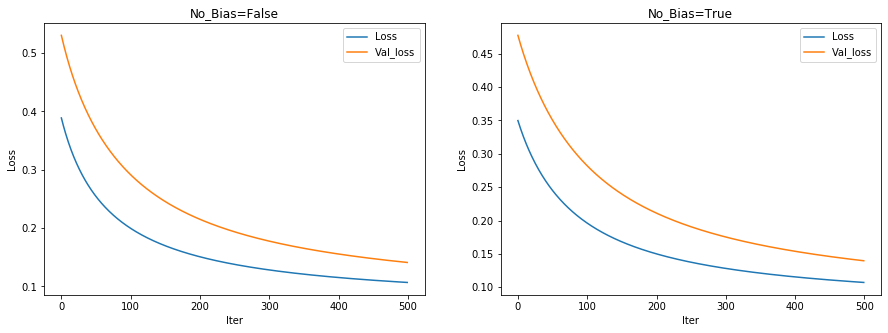

In [20]:
loss =  slr.loss
val_loss = slr.val_loss

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title('No_Bias=False')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.plot(range(len(loss)), loss, label='Loss')
plt.plot(range(len(val_loss)), val_loss, label='Val_loss')
plt.legend()


loss =  slr_0.loss
val_loss = slr_0.val_loss

plt.subplot(1, 2, 2)
plt.title('No_Bias=True')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.plot(range(len(loss)), loss, label='Loss')
plt.plot(range(len(val_loss)), val_loss, label='Val_loss')
plt.legend()
plt.show()

## Scikitlern

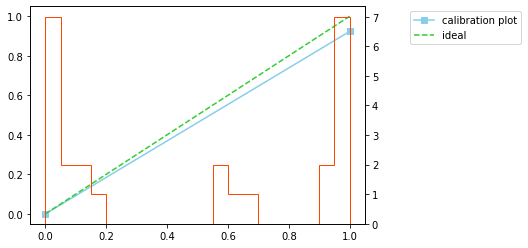

In [21]:
from sklearn.calibration import calibration_curve

#clf_predict_proba = clf.predict_proba(X_test_transformed)

prob = clf.predict_proba(X_test_transformed)[:, 1] # 目的変数が1である確率を予測
prob_true, prob_pred = calibration_curve(y_true=y_test, y_prob=clf_predict, n_bins=20)

fig, ax1 = plt.subplots()
ax1.plot(prob_pred, prob_true, marker='s', label='calibration plot', color='skyblue') # キャリプレーションプロットを作成
ax1.plot([0, 1], [0, 1], linestyle='--', label='ideal', color='limegreen') # 45度線をプロット
ax1.legend(bbox_to_anchor=(1.12, 1), loc='upper left')
ax2 = ax1.twinx() # 2軸を追加
ax2.hist(prob, bins=20, histtype='step', color='orangered') # スコアのヒストグラムも併せてプロット
plt.show()

### ネットで見つけたものをそのまま出力

# 【問題8】決定領域の可視化
決定領域を可視化してください。

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

## Plot

In [23]:
features_2_X = X_train_transformed[:,[0,2]]
print(features_2_X.shape)

(75, 2)


In [24]:
#特徴量をsepallength, petallengthにする。
new = X_train_transformed[:, [0, 2]]

#y_trainを1次元にする
y_new = y_train.values.reshape(-1)
y_new.shape

(75,)

In [25]:
# 学習(biasFalse, verbos=False)
# Scrtchモデルを特徴量2の訓練データを学習させる。
clf_slr = ScratchLogisticRegression(num_iter=500, lr=0.1, bias=False, verbose=False)
clf_slr.fit(new, y_train)


In [26]:
# Sklearnモデルを特徴量2の訓練データを学習させる。
clf_new = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(new, y_new) #訓練用データを学習させる
clf_new.fit(new, y_new)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

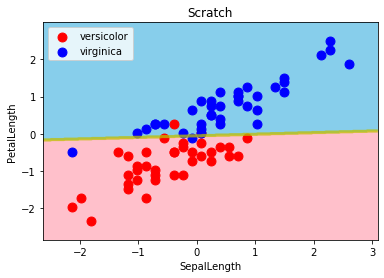

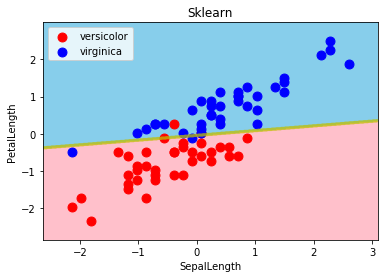

In [27]:
#Scratch
decision_region(new, y_new, clf_slr, title='Scratch', xlabel='SepalLength', ylabel='PetalLength', target_names=['versicolor', 'virginica'])
#Sklearn
decision_region(new, y_new, clf_new, title='Sklearn', xlabel='SepalLength', ylabel='PetalLength', target_names=['versicolor', 'virginica'])
